# Calculate Genre Of Songs By Modelling

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn import datasets, svm, tree, preprocessing, metrics

### Import dataset

In [2]:
data = pd.read_csv("../../data/cleanedDataSetWithGenres.csv")

### Explore the dataset

In [3]:
data.head()

,Unnamed: 0,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0,Pop
1,4,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0,Pop
2,5,7 rings,1,2019-03-16,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,Indonesia,125837.0,0.778,0.317,1.0,-10.732,0.3340,0.592,0.000000,0.0881,0.3270,140.048,178627.0,Rap
3,6,Shape of You,1,2017-03-08,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Portugal,55132.0,0.825,0.652,1.0,-3.183,0.0802,0.581,0.000000,0.0931,0.9310,95.977,233713.0,R&B
4,9,Someone You Loved,1,2019-03-16,Lewis Capaldi,https://open.spotify.com/track/2TIlqbIneP0ZY1O...,Ireland,63074.0,0.501,0.405,1.0,-5.679,0.0319,0.751,0.000000,0.1050,0.4460,109.891,182161.0,Pop


In [4]:
data.dtypes

Unnamed: 0            int64
title                object
rank                  int64
date                 object
artist               object
url                  object
region               object
streams             float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
genre                object
dtype: object

In [5]:
# Drop unnamed column with old index.
data.drop('Unnamed: 0', inplace=True, axis=1)

In [6]:
# Show distribution of genres.
data['genre'].value_counts()

Rap          25626
Pop          24032
Rock          3743
R&B           3239
Country        520
Non-Music      212
Name: genre, dtype: int64

<AxesSubplot:>

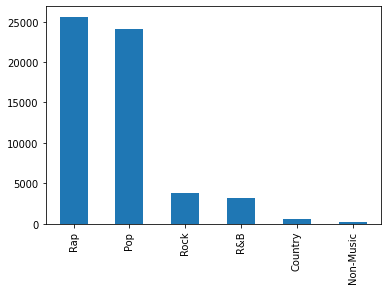

In [7]:
data['genre'].value_counts().plot.bar()

In [8]:
# Show average values of different genres
data.groupby('genre').mean()

,rank,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
genre,,,,,,,,,,,,,
Country,95.019231,212055.023077,0.583544,0.627910,5.326923,-6.726113,0.046474,0.335949,0.002891,0.181667,0.537142,120.929127,208160.923077
Non-Music,102.301887,27814.735849,0.636929,0.622670,5.877358,-7.590509,0.134773,0.361539,0.026572,0.196504,0.535940,123.359623,202248.702830
Pop,83.792485,58513.342002,0.639167,0.637737,5.314178,-6.693467,0.080394,0.282070,0.019803,0.174042,0.513969,120.774922,211737.559028
R&B,80.589071,104483.780488,0.649587,0.581889,5.253860,-7.266507,0.113669,0.310684,0.015652,0.162309,0.466005,117.533882,209227.576899
Rap,71.958246,111037.086123,0.733299,0.647470,5.320584,-7.063168,0.209611,0.232026,0.007154,0.169027,0.494533,122.092469,190726.468387
Rock,97.218274,54360.912103,0.536877,0.711454,5.332087,-6.675606,0.061901,0.173021,0.059505,0.193132,0.475750,124.939532,237187.927865


In [45]:
data.corr()

,rank,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
rank,1.000000,-0.071733,-0.039571,-0.008240,-0.003710,-0.041149,0.026157,0.023173,0.026211,0.019740,-0.021164,-0.013829,-0.034387
streams,-0.071733,1.000000,0.013244,-0.054185,-0.006170,0.008528,0.049612,-0.008479,-0.007509,0.010141,-0.070182,0.003257,-0.034188
danceability,-0.039571,0.013244,1.000000,0.098647,0.007529,0.077020,0.150154,-0.202518,-0.027530,-0.084828,0.334702,-0.074984,-0.217149
energy,-0.008240,-0.054185,0.098647,1.000000,0.029266,0.690027,0.009008,-0.436093,-0.035510,0.124784,0.356057,0.057210,-0.050643
key,-0.003710,-0.006170,0.007529,0.029266,1.000000,-0.006678,0.029575,0.012737,0.003692,-0.001379,0.045157,0.007823,-0.019867
loudness,-0.041149,0.008528,0.077020,0.690027,-0.006678,1.000000,-0.128264,-0.334114,-0.112977,0.056855,0.259502,0.037314,-0.052682
speechiness,0.026157,0.049612,0.150154,0.009008,0.029575,-0.128264,1.000000,-0.017547,-0.067156,0.039975,0.045120,0.047505,-0.132727
acousticness,0.023173,-0.008479,-0.202518,-0.436093,0.012737,-0.334114,-0.017547,1.000000,0.003596,-0.051975,-0.104248,-0.057033,0.067066
instrumentalness,0.026211,-0.007509,-0.027530,-0.035510,0.003692,-0.112977,-0.067156,0.003596,1.000000,-0.021590,-0.058337,-0.008918,0.041880
liveness,0.019740,0.010141,-0.084828,0.124784,-0.001379,0.056855,0.039975,-0.051975,-0.021590,1.000000,0.046480,-0.001990,-0.000962


In [54]:
grouped = data.groupby(['genre'])
grouped.boxplot(rot=45, fontsize=12, figsize=(8,10)) 

AttributeError: 'SeriesGroupBy' object has no attribute 'boxplot'